# Conceptual

### 1. Using basic statistical properties of the variance, as well as singlevariable calculus, derive (5.6). In other words, prove that α given by (5.6) does indeed minimize Var(αX + (1 − α)Y ).
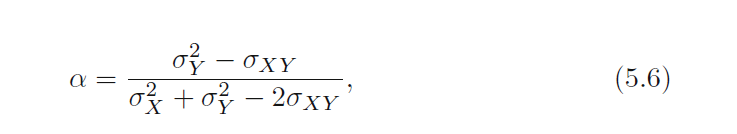

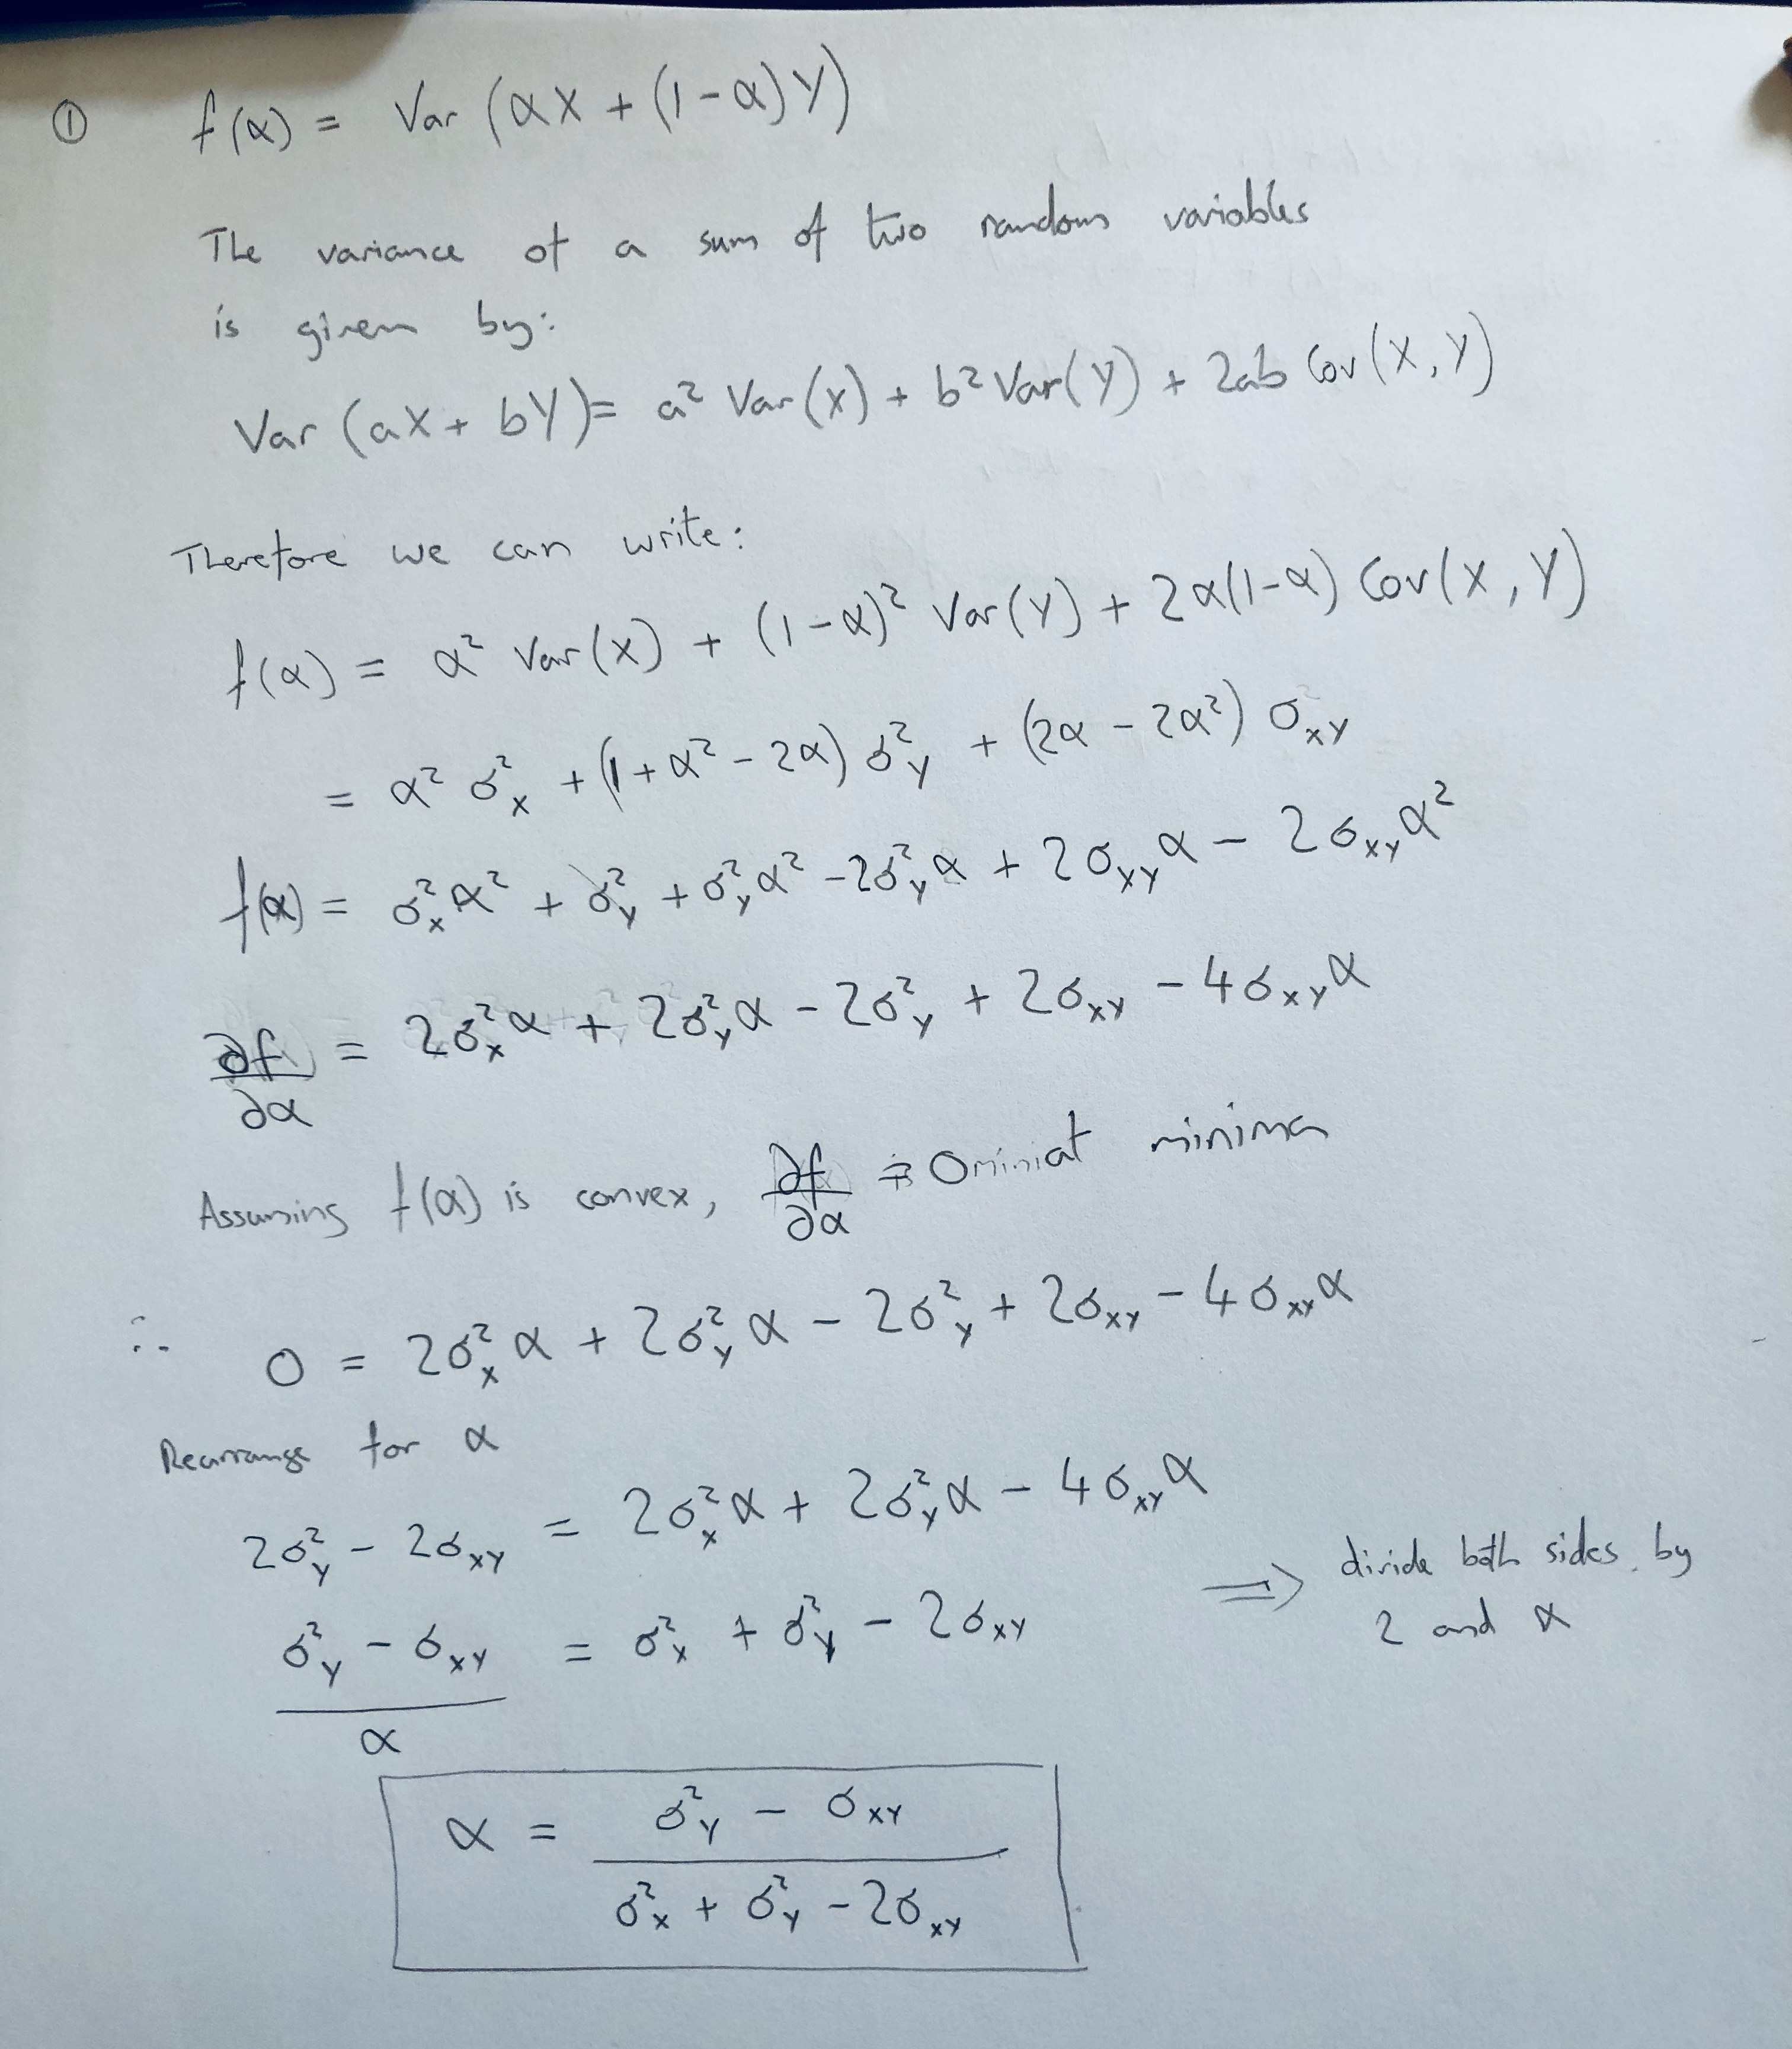

In [1]:
from IPython.display import Image
Image("./5_1.jpg")

### 2. We will now derive the probability that a given observation is part of a bootstrap sample. Suppose that we obtain a bootstrap sample from a set of n observations.¶

### (a) What is the probability that the first bootstrap observation is not the jth observation from the original sample? Justify your answer.

- For the first observation, the probability that the observation is jth observation from the original sample is 1/n, so the probability is not the jth observation = 1-1/n

### (b) What is the probability that the second bootstrap observation is not the jth observation from the original sample?

- Since booststrap is sampling with replacement, so same as (a), the second observation is the jth observation is 1/n , so the probability is not the jth observation is 1-1/n

### (c) Argue that the probability that the jth observation is not in the bootstrap sample is (1 − 1/n)^n.

- The probability is not the first observation is 1-1/n; not the second observation is 1-1/n;...;not the nth observation is 1-1/n. So the probability is not in the bootstra sample is (1-1/n)(1-1/n)...(1-1/n) = (1-1/n)^n

### (d) When n = 5, what is the probability that the jth observation is in the bootstrap sample?

In [2]:
P = 1-(1-1/5)**5

P

0.6723199999999999

### (e) When n = 100, what is the probability that the jth observation is in the bootstrap sample?

In [3]:
P = 1-(1-1/100)**100

P

0.6339676587267709

### (f) When n = 10, 000, what is the probability that the jth observation is in the bootstrap sample?

In [4]:
P = 1-(1-1/10000)**10000
P

0.6321389535670295

### (g) Create a plot that displays, for each integer value of n from 1 to 100, 000, the probability that the jth observation is in the bootstrap sample. Comment on what you observe.

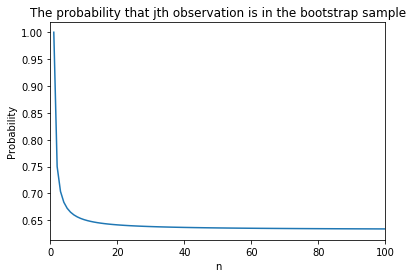

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def boostrap_plot():
    n = np.arange(1,100000)
    p = 1-(1-1/n)**n
    _ = plt.plot(n,p)
    plt.xlabel('n')
    plt.ylabel('Probability')
    plt.title('The probability that jth observation is in the bootstrap sample')
    plt.xlim([0,100])
    
boostrap_plot()

- The probability quickly dropped when n <10 and stayed the same around .65 when n increases

### (h) We will now investigate numerically the probability that a bootstrap sample of size n = 100 contains the jth observation. Here j = 4. We repeatedly create bootstrap samples, and each time we record whether or not the fourth observation is contained in the bootstrap sample.Comment on the results obtained.

In [32]:
l = []
for i in np.arange(1,10000):
    l+= [np.sum(np.random.randint(1,101,100) == 4)>0]
np.mean(l)

0.6416641664166417

- The probability is similar as we obtained above

### 3. We now review k-fold cross-validation.

### (a) Explain how k-fold cross-validation is implemented

- You divide the sample into equal sized k folds, and train k-1 fold each time and use the rest of the fold to test model performance, and then averaged results of say, MSE over the k times training

### (b) What are the advantages and disadvantages of k-fold crossvalidation relative to:
- i. The validation set approach?
- ii. LOOCV?

#### Compared to the validation set:
- Advantages:
     - all observations can be used to train the model and the averaged errors across k-fold can more accurately reflect the true error 
     - When k>2, cross-validation provides a larger training set than the validation set approach. This means that there is less bias in the training setting. This means crossvalidation can produce more accurate estimates for more flexible models that benefit from a larger number of observations in the training set.
     
- Disadvantages:
      - more time consuming than the validation set approach
      - more variability

#### Compared to the LOOCV:
- Advantages:
    - Less variance of the error
    - more efficient
- Disadvantages:
    - LOOCV provides the maximum proportion of the original observations for training, which could provide an improved accuracy estimate if the model is limited by the size of training set available in k-fold cross validation (for some small value of k).
    - LOOCV can also be more computationally efficient for linear regression assuming that the afformentioned mathematical shortcut is implemented.
    
    
### J.
- i. The `validation set approach` will only give us a **single value estimate** for the error. In addition, the error on the validation set is a poor reflection of the performance of the full model where we use all the data. `k-fold CV` also uses every single piece of data as both a train and test data point. The **disadvantage** is that each of our k has more variability individually since our test errors are run on smaller sets.

- ii. k-fold CV is much **less computationally intensive** than LOOCV in general. k-fold also tends to give **better estimates of the error** over LOOCV. LOOCV however is **computationally faster for linear approximators** (i.e. they can be represented by a linear system such as ^y=Ay).

### 4. Suppose that we use some statistical learning method to make a prediction for the response Y for a particular value of the predictor X. Carefully describe how we might estimate the standard deviation of our prediction.

### My Ans.

- For each of the observation we could have a prediction, and using the formula of variance we can calculate the SD of the prediction

### J.
We would use `bootstrapping`. In order to use it, we take a **otstrap sample of our X data**We then run the model and estimate Y at X. We do that 10,000 (or however many) times to get Y (b).. Once we do that, we can calculate the standard deviation of Y (1),…,Y(10,000).

# Applied

### 5. In Chapter 4, we used logistic regression to predict the probability of default using income and balance on the Default data set. We will now estimate the test error of this logistic regression model using the validation set approach. Do not forget to set a random seed before beginning your analysis.

### (a) Fit a logistic regression model that uses income and balance to predict default.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [35]:
default = pd.read_csv('./Data/Default.csv')

default.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [36]:
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [37]:
default.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462905
50%,823.636973,34552.644800
75%,1166.308387,43807.729275
max,2654.322576,73554.233500


In [39]:
#Fit a logistic model
default['default_n'] = np.where(default['default'] == 'No',0,1)
lr_fit1 = smf.logit('default_n ~ balance + income',data = default).fit()
lr_fit1.summary()

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              default_n   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sun, 13 Sep 2020   Pseudo R-squ.:                  0.4594
Time:                        17:48:35   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0.000     24.835      0.000       0.005       0.006
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [40]:
default['default_n'].value_counts()

0    9667
1     333
Name: default_n, dtype: int64

- The dataset is so imbalanced!!!

### (b) Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps:
- i. Split the sample set into a training set and a validation set.
- ii. Fit a multiple logistic regression model using only the training observations.
- iii. iii. Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of default for that individual, and classifying the individual to the default category if the posterior probability is greater than 0.5.
- iv. Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.

In [45]:
X = default[['balance','income']]
y = default[['default_n']]

In [66]:
def validation1(seed = 122,dp = X,rp = y):
    X_train,X_test,y_train,y_test = train_test_split(dp,rp,random_state = seed,test_size = .3)
    lr_fit = LogisticRegression().fit(X_train,y_train)
    lr_pred = lr_fit.predict(X_test) #Default should be .5
    test_error = 1-accuracy_score(y_test,lr_pred)
    return test_error

In [65]:
test_error1 = validation1()
test_error1

0.03866666666666663

### (c) Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set. Comment on the results obtained.

In [51]:
test_error2 = validation1(seed = 222)
test_error2

0.03266666666666662

In [52]:
test_error3 = validation1(seed = 1)
test_error3

0.030333333333333323

- Each time the test error varies, which is due to using different samples to fit the model

### (d) Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable for student. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for student leads to a reduction in the test error rate.

In [59]:
default2 = default.copy()
#Get dummy variables for student
default2 = pd.get_dummies(default2,columns = ['student'],prefix = ['student'],drop_first = True)
default2.head()

,default,balance,income,default_n,student_Yes
0,No,729.526495,44361.62507,0,0
1,No,817.180407,12106.13470,0,1
2,No,1073.549164,31767.13895,0,0
3,No,529.250605,35704.49394,0,0
4,No,785.655883,38463.49588,0,0


In [60]:
X2 = default2[['balance','income','student_Yes']]
y2 = default2[['default_n']]

In [67]:
test_error_df2 = validation1(seed = 122,dp = X2,rp = y2)
test_error_df2

0.03866666666666663

- using the same seed, it seems that adding a dummy variable did not improve model accuracy

### 6. We continue to consider the use of a logistic regression model to predict the probability of default using income and balance on the Default data set. In particular, we will now compute estimates for the standard errors of the income and balance logistic regression coefficients in two different ways: (1) using the bootstrap, and (2) using the standard formula for computing the standard errors in the glm() function. Do not forget to set a random seed before beginning your analysis.

### (a) Using the summary() and glm() functions, determine the estimated standard errors for the coefficients associated with income and balance in a multiple logistic regression model that uses both predictors.

In [68]:
#Coefficient SE using built-in function
lr_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              default_n   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sun, 13 Sep 2020   Pseudo R-squ.:                  0.4594
Time:                        19:42:21   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0.000     24.835      0.000       0.005       0.006
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### (b) Write a function, boot.fn(), that takes as input the Default data set as well as an index of the observations, and that outputs the coefficient estimates for income and balance in the multiple logistic regression model.

### (c) Use the boot() function together with your boot.fn() function to estimate the standard errors of the logistic regression coefficients for income and balance.

In [119]:
#Generate bootstrap samples and esitmate the se of the logistic regression coefficients
def boot_idx(n):
    '''
    Generate index of the dataset
    '''
    return np.random.choice(n,size = n)

def boot(data,B):
    '''
    Generate bootstrap samples B times
    '''
    results = []
    for i in range(B):
        samples = smf.logit('default_n ~ income + balance',data = data.iloc[boot_idx(data.shape[0])]).fit(disp = False)
        results += [samples.params]
    final = pd.DataFrame(results)
    coef_mean = final.mean(axis = 0)
    coef_se = final.std(axis = 0)
    out = pd.DataFrame([coef_mean,coef_se]).T
    out = out.rename(columns = {0:'Coef_Mean',1:'Coef_SE'})
    return out
        
    

In [127]:
boot_strap = boot(default,1000)

In [128]:
boot_strap

,Coef_Mean,Coef_SE
Intercept,-11.558463,0.419531
income,0.000021,0.000005
balance,0.005652,0.000223


### (d) Comment on the estimated standard errors obtained using the glm() function and using your bootstrap function.

In [131]:
glm_coef = pd.DataFrame({'glm_coef_mean':lr_fit1.params,'glm_coef_se':lr_fit1.bse})

compare = pd.concat([boot_strap,glm_coef],axis = 1)

compare

,Coef_Mean,Coef_SE,glm_coef_mean,glm_coef_se
Intercept,-11.558463,0.419531,-11.540468,0.434772
income,0.000021,0.000005,0.000021,0.000005
balance,0.005652,0.000223,0.005647,0.000227


- THe results almost the same

### 7. In Sections 5.3.2 and 5.3.3, we saw that the cv.glm() function can be used in order to compute the LOOCV test error estimate. Alternatively, one could compute those quantities using just the glm() and predict.glm() functions, and a for loop. You will now take this approach in order to compute the LOOCV error for a simple logistic regression model on the Weekly data set. Recall that in the context of classification problems, the LOOCV error is given in (5.4).

### (a) Fit a logistic regressionmodel that predicts Direction using Lag1 and Lag2.

In [132]:
weekly = pd.read_csv('./Data/Weekly.csv')
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [133]:
weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1089 non-null   int64  
 1   Lag1       1089 non-null   float64
 2   Lag2       1089 non-null   float64
 3   Lag3       1089 non-null   float64
 4   Lag4       1089 non-null   float64
 5   Lag5       1089 non-null   float64
 6   Volume     1089 non-null   float64
 7   Today      1089 non-null   float64
 8   Direction  1089 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 76.7+ KB


In [135]:
weekly['Direction_n'] = np.where(weekly['Direction'] == 'Down',0,1)
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Direction_n
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up,1


In [136]:
wk_fit1 = smf.logit('Direction_n ~ Lag1 + Lag2',data = weekly).fit(disp = False)
wk_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Direction_n   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1086
Method:                           MLE   Df Model:                            2
Date:                Sun, 13 Sep 2020   Pseudo R-squ.:                0.005335
Time:                        20:55:30   Log-Likelihood:                -744.11
converged:                       True   LL-Null:                       -748.10
                                        LLR p-value:                   0.01848
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2212      0.061      3.599      0.000       0.101       0.342
Lag1          -0.0387      0.026     -1.477      0.140      -0.090       0.013
Lag2           0.0602      0.027      2.270      0.023       0.008       0.112
==============================================================================
"""

### (b) Fit a logistic regressionmodel that predicts Direction using Lag1 and Lag2 using all but the first observation.

In [142]:
weekly2 = weekly.iloc[1:,:]
weekly2.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Direction_n
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up,1
5,1990,1.178,0.712,3.514,-2.576,-0.270,0.154444,-1.372,Down,0


In [144]:
wk_fit2 = smf.logit('Direction_n ~ Lag1 + Lag2',data = weekly2).fit(disp = False)
wk_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Direction_n   No. Observations:                 1088
Model:                          Logit   Df Residuals:                     1085
Method:                           MLE   Df Model:                            2
Date:                Sun, 13 Sep 2020   Pseudo R-squ.:                0.005387
Time:                        20:57:52   Log-Likelihood:                -743.26
converged:                       True   LL-Null:                       -747.29
                                        LLR p-value:                   0.01785
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2232      0.061      3.630      0.000       0.103       0.344
Lag1          -0.0384      0.026     -1.466      0.143      -0.090       0.013
Lag2           0.0608      0.027      2.291      0.022       0.009       0.113
==============================================================================
"""

### (c) Use the model from (b) to predict the direction of the first observation. You can do this by predicting that the first observation will go up if P(Direction="Up"|Lag1, Lag2) > 0.5. Was this observation correctly classified?

In [177]:
first_obs = weekly.iloc[[0],:]
first_pred = np.where(wk_fit2.predict(first_obs)<.5,0,1)

In [178]:
print(first_pred[0] == weekly.head(1)['Direction_n'][0])

False


- It's NOT correctly classified

### (d) Write a for loop from i = 1 to i = n, where n is the number of observations in the data set, that performs each of the following steps:
- i. Fit a logistic regression model using all but the ith observation to predict Direction using Lag1 and Lag2.
- ii. Compute the posterior probability of the market moving up for the ith observation.
- iii. Use the posterior probability for the ith observation in order to predict whether or not the market moves up.
- iv. Determine whether or not an error was made in predicting the direction for the ith observation. If an error was made, then indicate this as a 1, and otherwise indicate it as a 0.

In [259]:
def loocv(df,n):
    results = []
    for i in range(n):
        one_out = df.iloc[[i],:] #Select the nth observation
        data = df.drop(i,axis = 0)
        wk_fit = smf.logit('Direction_n ~ Lag1 + Lag2',data = data).fit(disp= False)
        wk_pred = np.where(wk_fit.predict(one_out)<.5,0,1)[0]
        results.append(np.sum(wk_pred != one_out['Direction_n'].values[0]))
    return results
    

### (e) Take the average of the n numbers obtained in (d)iv in order to obtain the LOOCV estimate for the test error. Comment on the results.

In [260]:
loocv_result = loocv(weekly,weekly.shape[0])
avg_error = np.mean(loocv_result)

In [261]:
avg_error

0.44995408631772266

- The testing error yielded by LOOCV is .45, we would expect this result has higher variance but less bias than using validation set only. 

### 8. We will now perform cross-validation on a simulated data set.

### (a) Generate a simulated data set as follows:

In [274]:
np.random.seed(1)
x = np.random.normal(size = 100)
y = x-2*x**2+np.random.normal(size = 100)

### In this data set, what is n and what is p? Write out the model used to generate the data in equation form.

- n = 100
- p = 2
- Formula: Y = X - 2X^2 + Error

### (b) Create a scatterplot of X against Y . Comment on what you find.

Text(0, 0.5, 'Y')

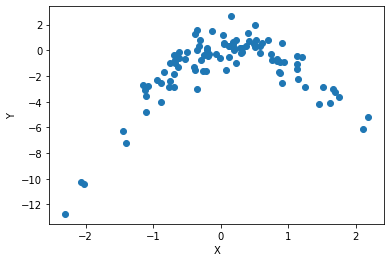

In [266]:
_ = plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')

- The plot exhibits qudratic and with noises

### (c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:
- i. Y = β0 + β1X + ɛ
- ii. Y = β0 + β1X + β2X2 + ɛ
- iii. Y = β0 + β1X + β2X2 + β3X3 + ɛ
- iv. Y = β0 + β1X + β2X2 + β3X3 + β4X4 + ɛ.

In [377]:
np.random.seed(1)
x = np.random.normal(size = 100)
y = x-2*x**2+np.random.normal(size = 100)

df_model = pd.DataFrame({'y':y,'X':x,'X2':x**2,'X3':x**3,'X4':x**4})

In [378]:
df_model.head()

,y,X,X2,X3,X4
0,-4.099779,1.624345,2.638498,4.285832,6.961671
1,-0.135741,-0.611756,0.374246,-0.228947,0.140060
2,-0.682611,-0.528172,0.278965,-0.147342,0.077822
3,-2.781913,-1.072969,1.151262,-1.235268,1.325403
4,-1.727365,0.865408,0.748930,0.648130,0.560897


In [420]:
from sklearn.model_selection import LeaveOneOut
def loocv_error(df,formula,seed = 1):
    np.random.seed(seed)
    results = []
    loo = LeaveOneOut()
    for train_idx,test_idx in loo.split(df):
        train = df.iloc[train_idx]
        test = df.iloc[test_idx]
        ols_fit = smf.ols(formula,train).fit()
        ols_pred = ols_fit.predict(test)
        error = np.square(ols_pred - test['y'])
        results.append(list(error))
    loocv_error = np.mean(results)
    return ols_fit,loocv_error
    

In [421]:
_,f1 = loocv_error(df_model,'y ~ X')
_,f2 = loocv_error(df_model,'y ~ X + X2')
_,f3 = loocv_error(df_model,'y ~ X + X2 + X3')
_,f4 = loocv_error(df_model,'y ~ X + X2 + X3 + X4')

In [414]:
flist = [f1,f2,f3,f4]
for i in range(4):
    print(f'The error for f{i+1} is:', flist[i])   

The error for f1 is: 6.260764331604616
The error for f2 is: 0.9142897072803662
The error for f3 is: 0.926876878164881
The error for f4 is: 0.8669116865881079


### (d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?

In [422]:
_,f1 = loocv_error(df_model,'y ~ X',seed = 100)
_,f2 = loocv_error(df_model,'y ~ X + X2',seed = 100)
_,f3 = loocv_error(df_model,'y ~ X + X2 + X3',seed = 100)
_,f4 = loocv_error(df_model,'y ~ X + X2 + X3 + X4',seed = 100)

flist = [f1,f2,f3,f4]
for i in range(4):
    print(f'The error for f{i+1} is:', flist[i]) 

The error for f1 is: 6.260764331604616
The error for f2 is: 0.9142897072803662
The error for f3 is: 0.926876878164881
The error for f4 is: 0.8669116865881079


- The results are the same, becuase there is no randomness in LOOCV

### (e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

- The second model has the smallest LOOCV, which is expected since the model is used to generate data is quadratic

### (f) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

In [423]:
ff1,_ = loocv_error(df_model,'y ~ X')
ff2,_ = loocv_error(df_model,'y ~ X + X2')
ff3,_ = loocv_error(df_model,'y ~ X + X2 + X3')
ff4,_= loocv_error(df_model,'y ~ X + X2 + X3 + X4')

In [427]:
fflist = [ff1,ff2,ff3,ff4]
for i in range(4):
    p_estimate = pd.DataFrame({'coefficient':fflist[i].params,'pvalues':fflist[i].pvalues})
    print('The coefficient estimates summary is:\n',p_estimate,'\n')

The coefficient estimates summary is:
            coefficient       pvalues
Intercept    -1.428383  6.133007e-08
X             0.847976  2.558510e-03 

The coefficient estimates summary is:
            coefficient       pvalues
Intercept     0.124872  2.848010e-01
X             1.086396  8.136059e-17
X2           -1.981981  3.081954e-41 

The coefficient estimates summary is:
            coefficient       pvalues
Intercept     0.115993  3.193373e-01
X             0.883541  9.270853e-06
X2           -1.971642  8.414181e-41
X3            0.085042  1.945461e-01 

The coefficient estimates summary is:
            coefficient       pvalues
Intercept     0.303112  2.832026e-02
X             0.888716  5.129943e-06
X2           -2.546057  4.647858e-17
X3            0.105886  1.013022e-01
X4            0.140694  1.563036e-02 



- The p-value for beta3 and beta4 coefficients are not statistically significant at the alpha = .05 level, which is consistent with the cross-validation results

### 9. We will now consider the Boston housing data set, from the MASS library.

### (a) Based on this data set, provide an estimate for the population mean of medv. Call this estimate ˆμ.

In [428]:
boston = pd.read_csv('./Data/Boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [429]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [430]:
mu_hat = boston['medv'].mean()
mu_hat

22.532806324110698

### (b) Provide an estimate of the standard error of ˆμ. Interpret this result.

### Hint: We can compute the standard error of the sample mean by dividing the sample standard deviation by the square root of the number of observations.

In [431]:
SE_samplemean = boston['medv'].std()/np.sqrt(boston.shape[0])
SE_samplemean

0.4088611474975351

### (c) Now estimate the standard error of ˆμ using the bootstrap. How does this compare to your answer from (b)?

In [445]:
def boot_mean (B,seed = 1):#Select number of B bootstrap samples
    np.random.seed(seed)
    results = []
    for i in range(B):
        n = boston.shape[0]
        idx = np.random.choice(n,size = n)
        sample = boston.iloc[idx]['medv']
        s_mean = sample.mean()
        results.append(s_mean)
    return results    

In [447]:
smean_SE = np.std(boot_mean(1000))
smean_SE

0.41240270127186873

- It's very similar!

### (d) Based on your bootstrap estimate from (c), provide a 95% confidence interval for the mean of medv. Compare it to the results obtained using t.test(Boston$medv).

In [453]:
lower,upper = boston['medv'].mean() -1.96*smean_SE, boston['medv'].mean()+1.96*smean_SE

lower,upper

(21.724497029617837, 23.34111561860356)

In [454]:
import scipy.stats as st

upper,lower = st.t.interval(alpha = .95,df = len(boston)-1,loc = np.mean(boston['medv']),scale = st.sem(boston['medv']))

upper,lower

(21.729528014578616, 23.33608463364278)

- The two results are pretty similar!

### (e) Based on this data set, provide an estimate, ˆμmed, for the median value of medv in the population.

In [455]:
median_hat = boston['medv'].median()

median_hat

21.2

### (f) We now would like to estimate the standard error of ˆμmed. Unfortunately, there is no simple formula for computing the standard error of the median. Instead, estimate the standard error of the median using the bootstrap. Comment on your findings.

In [458]:
def boot_median(B,seed = 1):
    np.random.seed(seed)
    result = []
    n = boston.shape[0]
    for i in range(B):
        idx = np.random.choice(n,size = n)
        sample = boston.iloc[idx]['medv']
        s_median = sample.median()
        result.append(s_median)
    return result    

In [459]:
median_SE = np.std(boot_median(B = 1000))
median_SE

0.3745979044255317

### (g) Based on this data set, provide an estimate for the tenth percentile of medv in Boston suburbs. Call this quantity ˆμ0.1. (You can use the quantile() function.)

In [461]:
medv_p10 = np.percentile(boston['medv'],10)
medv_p10

12.75

### (h) Use the bootstrap to estimate the standard error of ˆμ0.1. Comment on your findings.

In [470]:
def boot_p10(B,seed = 1):
    np.random.seed(seed)
    results = []
    n = boston.shape[0]
    for i in range(B):
        idx = np.random.choice(n,size = n)
        sample = boston.iloc[idx]['medv']
        results.append(np.percentile(sample,10))
    return results
    

In [471]:
se_p10 = np.std(boot_p10(10000))
se_p10

0.49762463943719665

- The SE of the 10th percentile is similar as mean and slightly higher than median